# K Means Clustering Implementation

In [13]:
# Importing Library
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [14]:
X,y = make_blobs(n_samples=1000, centers=3,n_features=2,random_state=23)

In [15]:
X.shape

(1000, 2)

In [16]:
# making a scatterplot to see the values

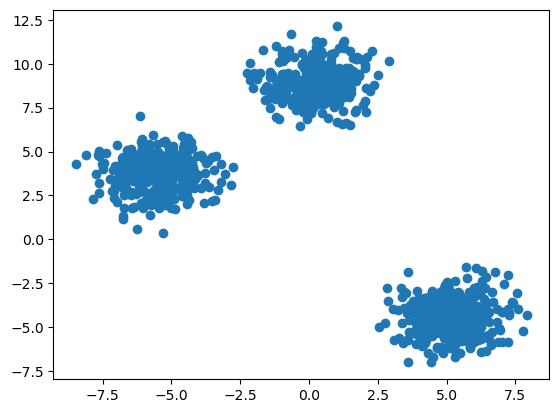

In [17]:
plt.scatter(X[:,0],X[:,1],)

In [18]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.33,random_state=42)

In [19]:
from sklearn.cluster import KMeans

In [20]:
## Manual Process 

## Elbow Method to select the K Value

In [21]:
wcss = []

for k in range(1,11) :
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

In [22]:
wcss

[34827.57682552022,
 7935.437286145418,
 1319.2730531585605,
 1140.4677884655127,
 991.8238694516632,
 853.603890357338,
 756.5427044249774,
 668.8944942733992,
 577.1900999595018,
 542.5450787771059]

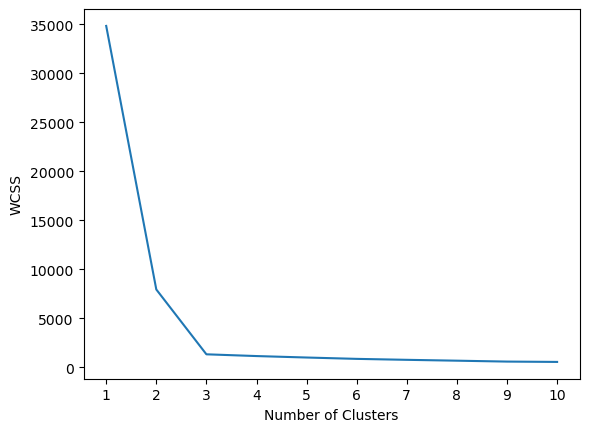

In [23]:
# plotting elbow curve

plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [24]:
kmeans = KMeans(n_clusters=3,init='k-means++')

In [26]:
ylabels = kmeans.fit_predict(X_train)

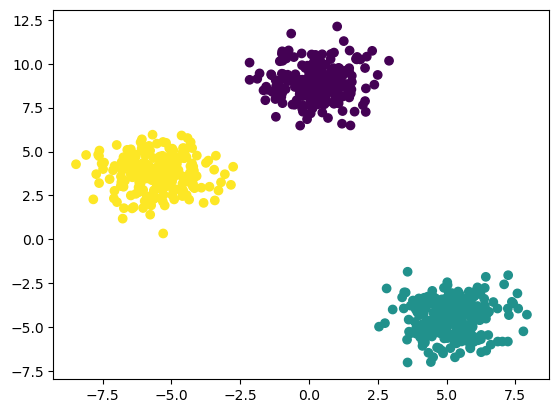

In [28]:
plt.scatter(X_train[:,0],X_train[:,1], c=ylabels)

In [29]:
# for the test data

y_test_label = kmeans.predict(X_test)

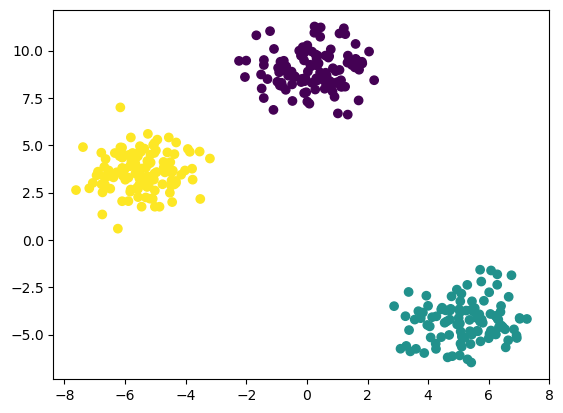

In [30]:
plt.scatter(X_test[:,0],X_test[:,1], c=y_test_label)

In [31]:
# for automation we can use the knee locator in the sklearn 

In [32]:
# we need to install the kneed for this 

!pip install kneed

In [33]:
from kneed import KneeLocator

In [35]:
kl = KneeLocator(range(1,11),wcss, curve='convex',direction='decreasing') # the value is decreasing thats we use convex, if it increased then we will use concave
kl.elbow

3

In [36]:
# Performance Matrics

## Silhoutte score

from sklearn.metrics import silhouette_score

In [39]:
silhouette_coefficients = []

for k in range(2,11) :
    kmeans = KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train)
    score = silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficients.append(score)

In [40]:
silhouette_coefficients

[0.7281443868598331,
 0.8071181203797672,
 0.6357733426488265,
 0.49137731762633263,
 0.3407542064106686,
 0.34399913526368,
 0.34923451595062205,
 0.34587055312460985,
 0.34079184232146126]

<function matplotlib.pyplot.show(close=None, block=None)>

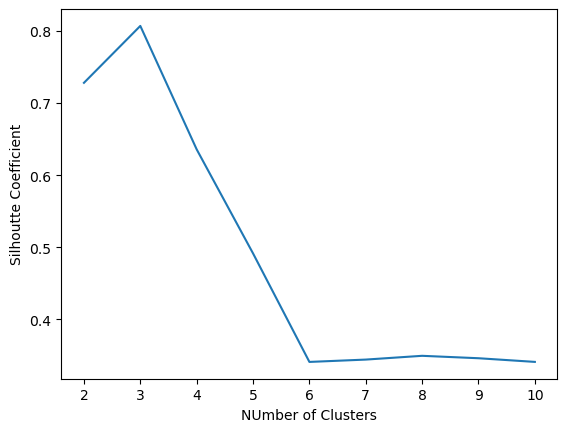

In [41]:
# plotting

plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("NUmber of Clusters")
plt.ylabel("Silhoutte Coefficient")
plt.show